# Basic DML example

In this notebook, we perform a basic run of the DML algorithm to obtain the basis transformation matrix, $\mathbf{M}$.

We then transform the data set to the new basis and visualize the data in the transformed space.

The transformation is performed for the state-space variables:

$$
\mathbf{X}_{DML} = \mathbf{X}_{cs} \mathbf{M}
$$

and the source terms of the state-space variables:

$$
\mathbf{S}_{DML} = \mathbf{S}_{s} \mathbf{M}
$$

where $\mathbf{X}_{cs}$ are the centered and scaled state-space variables and $\mathbf{S}_{s}$ are the scaled sources of the state-space variables.

***

In [2]:
%run -i ../dml.py
%run -i ../diagnostic.py
%run -i ../regression.py

data_path = '../data-sets/H2_data/'

#### Global settings:

In [3]:
n_components = 3
scaling = 'auto'
bandwidth = 1e-1

#### Load the data set:

In [4]:
data = pickle.load(open(data_path + 'H2-air-flamelet-vars.p','rb'))
src_terms = pickle.load(open(data_path + 'H2-air-flamelet-source-terms.p','rb'))
print(data.keys())
print(src_terms.keys())

exclude = ['mixture_fraction', 'chi_max', 'P', 'N2', 'HE', 'AR']

names = [name for name in data.keys() if name not in exclude]
X   = np.hstack([data     [name][None].T for name in names])
S_X = np.hstack([src_terms[name][None].T for name in names])

print(names)
print(len(names))
print(np.shape(X))
print(np.shape(S_X))

dict_keys(['mixture_fraction', 'chi_max', 'T', 'P', 'HE', 'H', 'H2', 'O', 'OH', 'H2O', 'O2', 'HO2', 'H2O2', 'AR'])
dict_keys(['T', 'P', 'HE', 'H', 'H2', 'O', 'OH', 'H2O', 'O2', 'HO2', 'H2O2', 'AR'])


#### Visualize the data set:

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


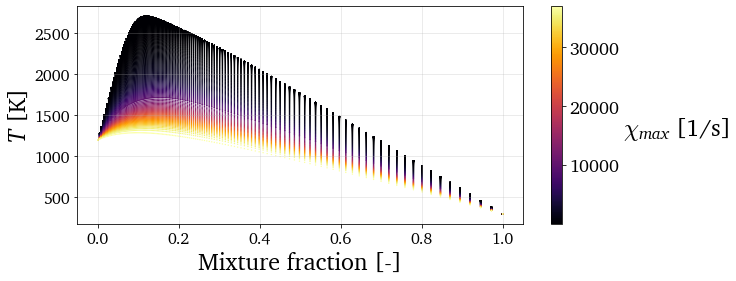

In [6]:
plt = reduction.plot_2d_manifold(data['mixture_fraction'], data['T'], color=data['chi_max'], x_label='Mixture fraction [-]', y_label='$T$ [K]', colorbar_label='$\chi_{max}$ [1/s]', color_map='inferno', figure_size=(10,4))

#### Preprocess the data set:

In [7]:
(X_cs, X_center, X_scale) = preprocess.center_scale(X, scaling=scaling)
S_X_s = S_X / X_scale

***

## Run DML

#### Compute the basis transformation matrix $\mathbf{M}$ using DML:

In [8]:
M = optimize_dml(S_X_s, S_X_s, b=bandwidth, projection_dimension=n_components, sigma=1e-7, column_weight=None, weight_option="Gaussian", percentile=0.05)

100%|██████████| 99/99 [05:03<00:00,  3.06s/it]


#### Plot the transformation matrix:

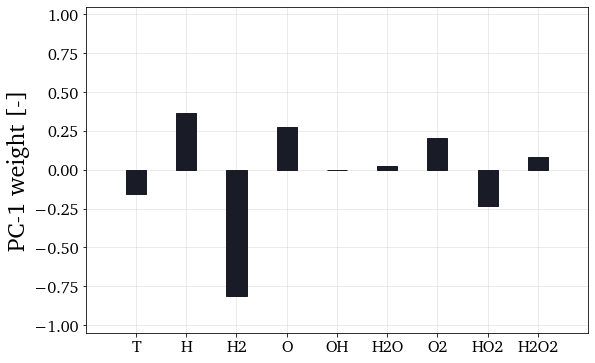

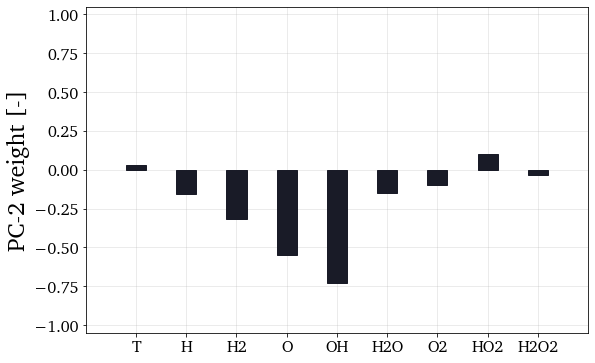

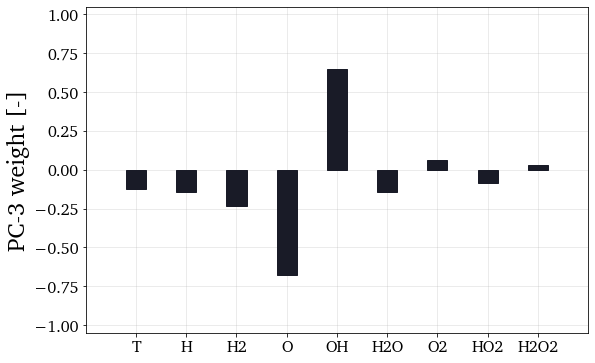

In [9]:
plt = reduction.plot_eigenvectors(M, variable_names=names)

#### Project the data set onto the new basis:

In [10]:
X_DML = X_cs @ M
S_X_DML = S_X_s @ M

print(np.shape(X_DML))
print(np.shape(S_X_DML))

(27430, 3)
(27430, 3)


#### Plot the 2D low-dimensional manifold:

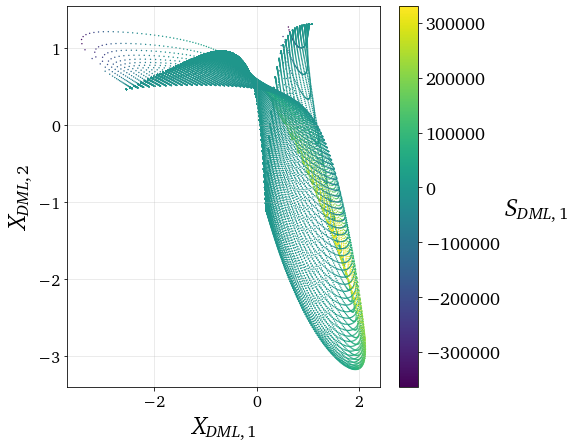

In [11]:
plt = reduction.plot_2d_manifold(X_DML[:,0], X_DML[:,1], color=S_X_DML[:,0], x_label='$X_{DML, 1}$', y_label='$X_{DML, 2}$', colorbar_label='$S_{DML, 1}$')

#### Plot the 3D low-dimensional manifold:

In [26]:
elev=30
azim=-200

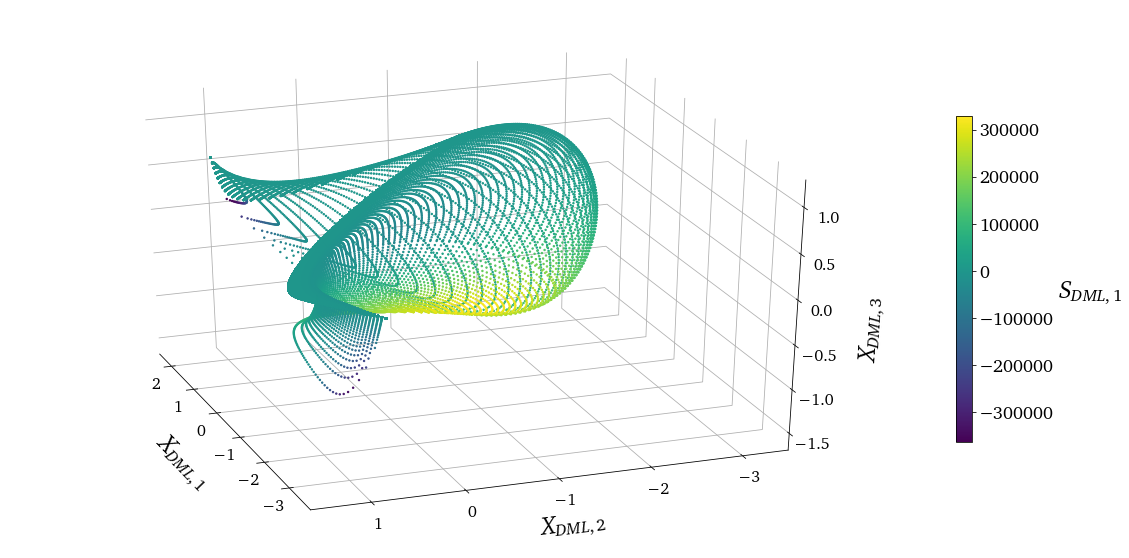

In [27]:
plt = reduction.plot_3d_manifold(X_DML[:,0], X_DML[:,1], X_DML[:,2], color=S_X_DML[:,0], elev=elev, azim=azim, x_label='$X_{DML, 1}$', y_label='$X_{DML, 2}$', z_label='$X_{DML, 3}$', colorbar_label='$S_{DML, 1}$', figure_size=(20,10))

***